# ~~~~~~~~~~~~~~~~~~~ Sales Data Analysis ~~~~~~~~~~~~~~~~~~~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

In [4]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [7]:
df.drop_duplicates(inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
# Add Month-Year column
df['Month_Year'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Month-Year
monthly_sales = df.groupby('Month_Year')['Sales'].sum().reset_index()
monthly_sales

,Month_Year,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


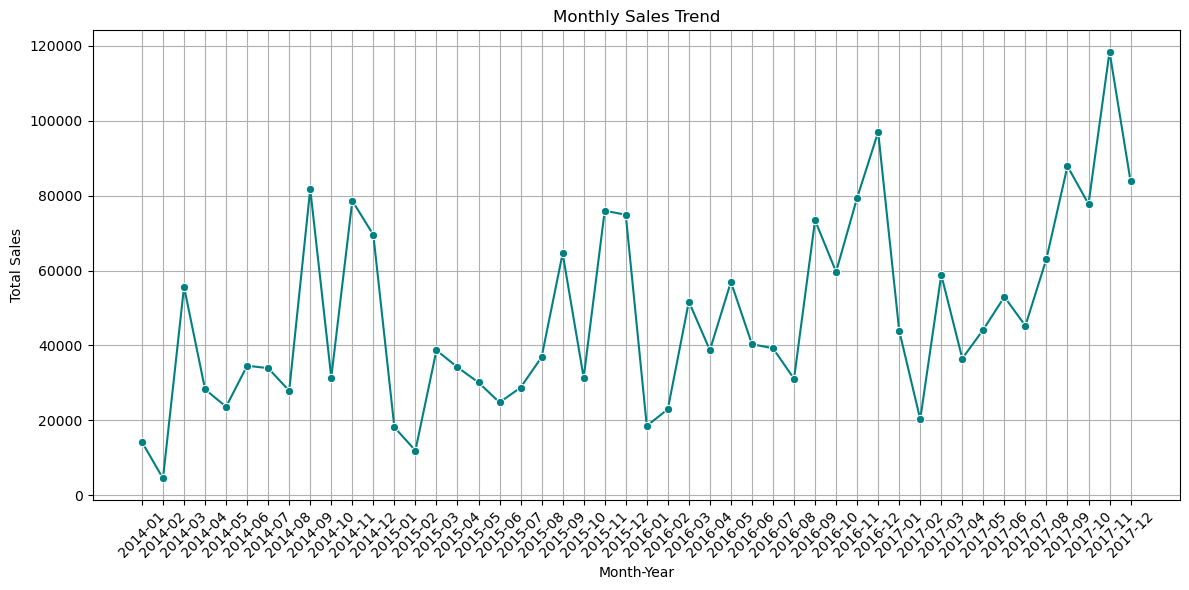

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Top 5 Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("Top Categories:\n", top_categories)

Top Categories:
 Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


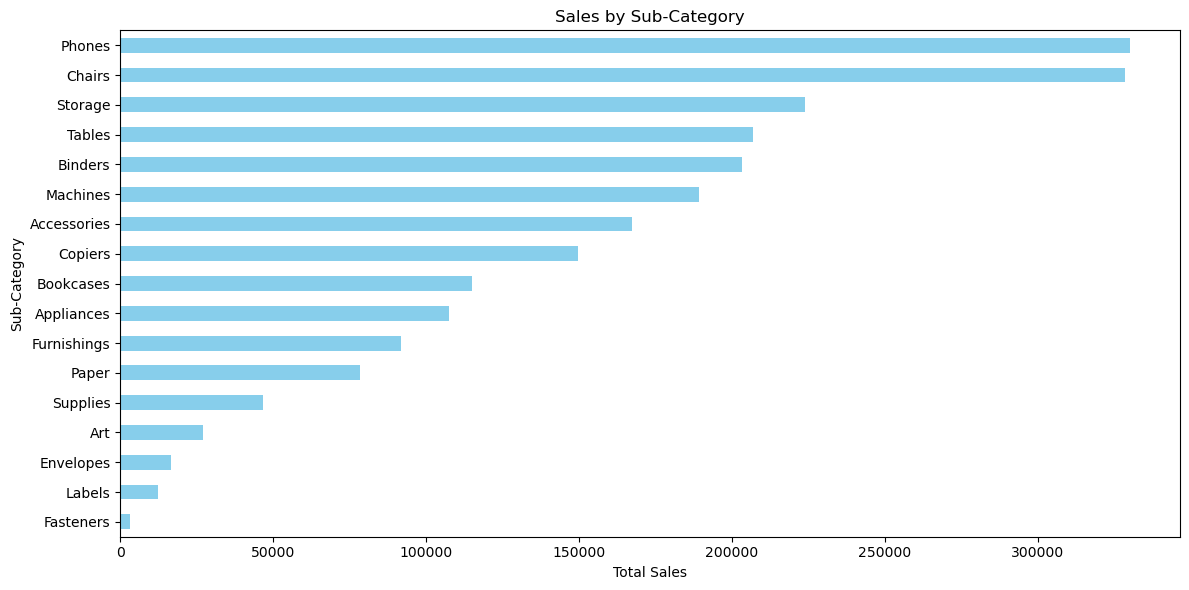

In [17]:
plt.figure(figsize=(12,6))
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values()
subcat_sales.plot(kind='barh', color='skyblue')
plt.title("Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

In [18]:
# Top 10 selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top Products:\n", top_products)

Top Products:
 Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


C:\Users\RAGHAV VYAS\AppData\Local\Temp\ipykernel_10136\2912154237.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


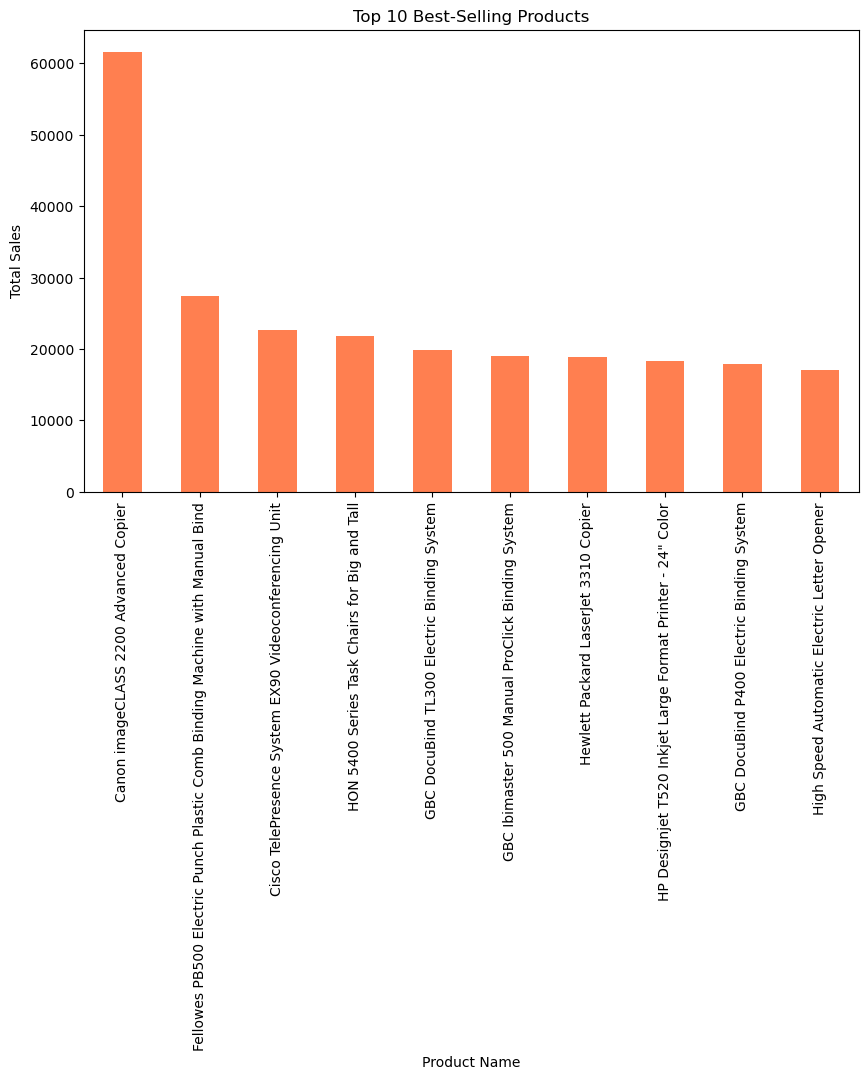

In [23]:
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='coral')
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\RAGHAV VYAS\AppData\Local\Temp\ipykernel_10136\110792630.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='pastel')
C:\Users\RAGHAV VYAS\AppData\Local\Temp\ipykernel_10136\110792630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='pastel')


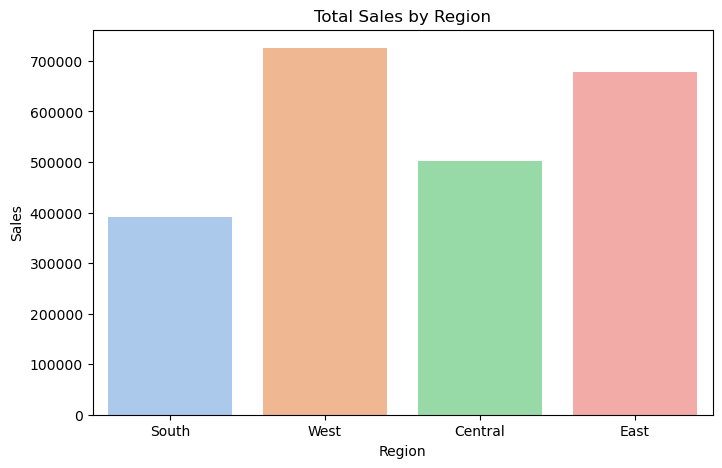

In [24]:
# Region Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='pastel')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

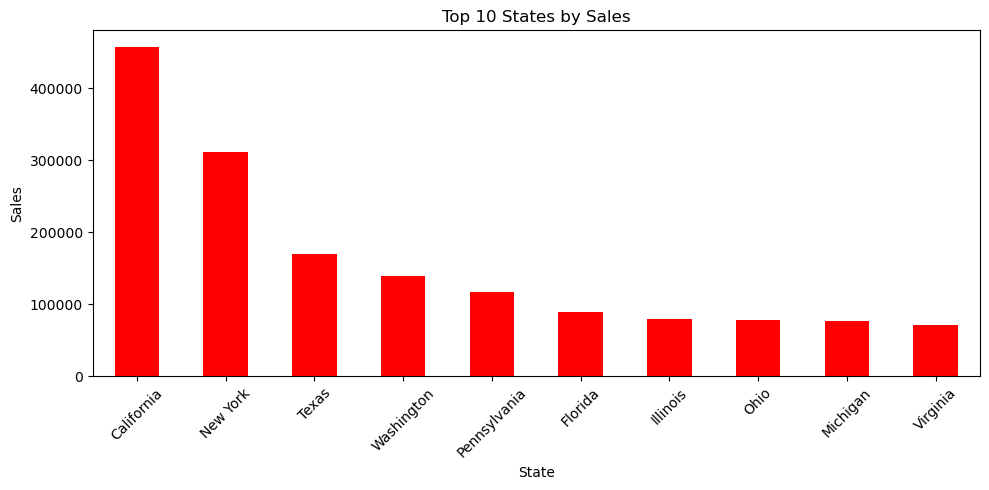

In [28]:
# Top 10 States by Sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
state_sales.plot(kind='bar', color='red')
plt.title("Top 10 States by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

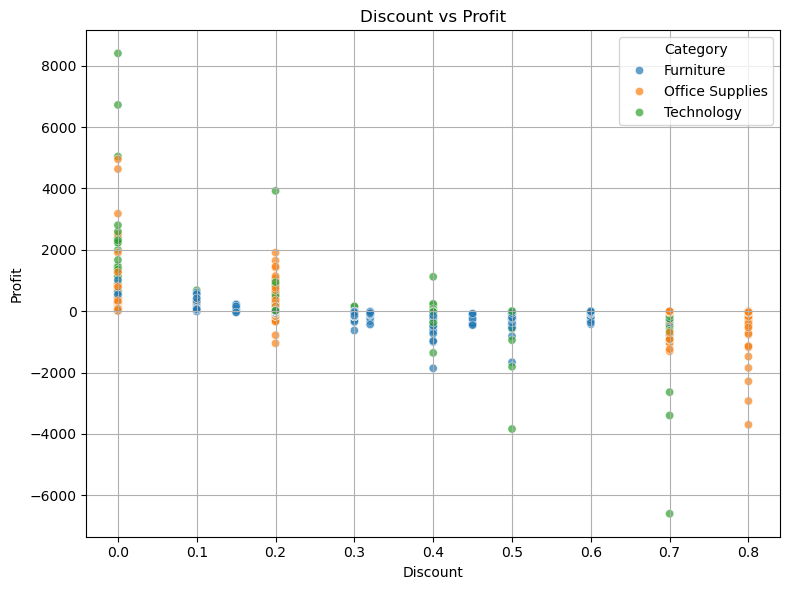

In [29]:
# Scatter plot between Discount and Profit
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Print basic stats
print("Total Sales:", df['Sales'].sum())
print("Total Profit:", df['Profit'].sum())
print("Average Discount:", df['Discount'].mean())
print("Most Profitable Category:", df.groupby('Category')['Profit'].sum().idxmax())
print("Least Profitable Category:", df.groupby('Category')['Profit'].sum().idxmin())

Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Discount: 0.15620272163297977
Most Profitable Category: Technology
Least Profitable Category: Furniture


# OBSERVATION:

~ Sales spiked in November and December, indicating strong seasonal demand during the holiday period.

~ Among the 3 categories, Technology had the highest sales and profit, followed by Office Supplies.

~ Phones, Chairs, Binders contributed significantly to revenue and are suitable for promotional focus.

~ Products like Canon Inkjet Wireless Printer and Office Chairs were the most sold, indicating high demand.

~ The West region, especially California, led in both sales and profit, making them prime targets for business expansion.

~ Heavy discounting, especially in the Furniture category, resulted in negative profits. A revised discount strategy is recommended.